In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random

%matplotlib inline

In [2]:
df = pd.read_csv('noisyamphibian (1).csv',delimiter=';')
new_header = df.iloc[0]
df = df[1:]
df.columns = new_header
newdf = df.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 1 to 196
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                196 non-null    object
 1   Motorway          196 non-null    object
 2   SR                196 non-null    object
 3   NR                196 non-null    object
 4   TR                196 non-null    object
 5   VR                196 non-null    object
 6   SUR1              102 non-null    object
 7   SUR2              196 non-null    object
 8   SUR3              196 non-null    object
 9   UR                159 non-null    object
 10  FR                196 non-null    object
 11  OR                196 non-null    object
 12  RR                165 non-null    object
 13  BR                196 non-null    object
 14  MR                196 non-null    object
 15  CR                176 non-null    object
 16  GreenFrogs        196 non-null    object
 17  BrownFrogs      

In [4]:
for x in df.columns:
    print(df[x].value_counts())

1      1
124    1
126    1
127    1
128    1
      ..
68     1
69     1
70     1
71     1
196    1
Name: ID, Length: 196, dtype: int64
S52    114
A1      82
Name: Motorway, dtype: int64
-2568.2963835568207    15
115998.51789200924      2
-81.60650627230825      2
-866.209002334941       2
164.44266289433835      2
                       ..
533.4912414417195       1
81.30768943282055       1
299.2980235047544       1
-380.7552040993651      1
848.0010638116655       1
Name: SR, Length: 175, dtype: int64
1.0                    138
2.0                     18
-3.8909697972181174     12
3.0                      7
5.0                      4
4.0                      4
6.0                      3
6.890969797218117        2
-8.781939594436235       2
9.0                      2
7.0                      1
7.890969797218117        1
10.0                     1
16.89096979721812        1
Name: NR, dtype: int64
1     106
12     23
15     19
?      18
5      11
14     11
2       4
11      3
7       1
N

In [5]:
# L = ['TR', 'UR', 'FR', 'MR']
# for i in range(1,190):
#     for x in L:
#         df.iloc["?", df.columns.get_loc(x)] = None

newdf = df.replace("?", None)

In [6]:
for x in newdf.columns:
    print(newdf[x].value_counts())

1      1
124    1
126    1
127    1
128    1
      ..
68     1
69     1
70     1
71     1
196    1
Name: ID, Length: 196, dtype: int64
S52    114
A1      82
Name: Motorway, dtype: int64
-2568.2963835568207    15
115998.51789200924      2
-81.60650627230825      2
-866.209002334941       2
164.44266289433835      2
                       ..
533.4912414417195       1
81.30768943282055       1
299.2980235047544       1
-380.7552040993651      1
848.0010638116655       1
Name: SR, Length: 175, dtype: int64
1.0                    138
2.0                     18
-3.8909697972181174     12
3.0                      7
5.0                      4
4.0                      4
6.0                      3
6.890969797218117        2
-8.781939594436235       2
9.0                      2
7.0                      1
7.890969797218117        1
10.0                     1
16.89096979721812        1
Name: NR, dtype: int64
1     106
12     23
15     19
5      11
14     11
2       4
11      3
7       1
Name: TR, d

<AxesSubplot:xlabel='0'>

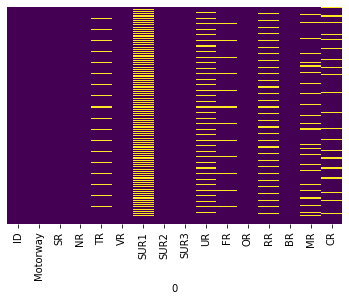

In [7]:
sns.heatmap(newdf.iloc[:,0:16].isnull(),yticklabels=False,cbar=False,cmap='viridis')

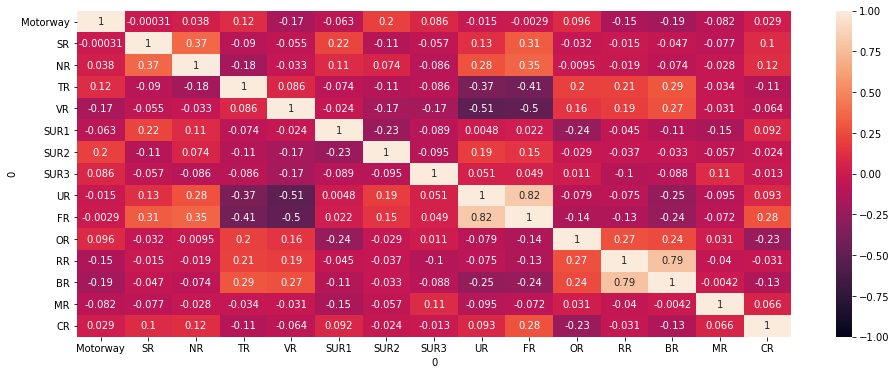

In [8]:
data_copy = newdf.iloc[:,0:16].copy()

data_copy['Motorway'] = data_copy['Motorway'].replace('A1', 1)
data_copy['Motorway'] = data_copy['Motorway'].replace('S52', 2)
data_copy = data_copy.apply(pd.to_numeric) 
data_copy = data_copy.drop(['ID'],axis=1)
plt.figure(figsize=(16, 6))
ax = sns.heatmap(data_copy.corr(),vmin=-1,vmax=1, annot=True)

In [9]:
from scipy.signal import savgol_filter
y = savgol_filter(df['SR'], 191, 6)
x = savgol_filter(df['NR'], 191, 6)
z = savgol_filter(df['OR'], 191, 6)


In [10]:
print(x)
print(y)
print(z)

[1.27445581 1.23808576 1.2085707  1.1853306  1.16781301 1.15549237
 1.14786922 1.14446956 1.14484407 1.14856748 1.15523783 1.16447581
 1.17592409 1.18924666 1.20412816 1.22027324 1.23740595 1.25526904
 1.27362343 1.29224752 1.31093665 1.32950246 1.34777231 1.36558874
 1.38280884 1.39930377 1.4149581  1.42966938 1.44334754 1.45591437
 1.46730301 1.47745745 1.48633202 1.49389091 1.50010765 1.50496471
 1.50845293 1.51057117 1.51132579 1.51073023 1.50880459 1.50557519
 1.50107418 1.49533908 1.48841247 1.48034152 1.47117766 1.46097617
 1.44979587 1.43769871 1.42474946 1.41101536 1.39656579 1.38147197
 1.36580662 1.34964368 1.33305799 1.31612505 1.2989207  1.28152085
 1.26400127 1.24643729 1.22890357 1.21147388 1.19422087 1.17721583
 1.16052852 1.14422694 1.12837715 1.1130431  1.09828644 1.08416635
 1.07073941 1.05805942 1.04617729 1.03514088 1.02499491 1.01578083
 1.00753669 1.0002971  0.9940931  0.98895209 0.98489775 0.98195003
 0.980125   0.97943491 0.97988808 0.98148891 0.98423784 0.9881

In [11]:
newdf['SR'] = y
newdf['NR'] = x
newdf['OR'] = z

In [12]:
def addRR(cols):
    RR = cols[0]
    BR = cols[1]
    
    if pd.isnull(RR):

        if BR == 0: #random function to generate a number from 0 to 10. If more than 8, pick 1 else pick 0
            y = random.randint(1, 10)
            if y < 8:
                return 0
            else: 
                return 1

        elif BR == 1:
            y = random.randint(1, 10)
            if y < 8:
                return 1
            else: 
                return 0
        
        elif BR == 2:
            y = random.randint(1, 10)
            if y < 8:
                return 2
            else: 
                return 5
        
        elif BR == 5:
            y = random.randint(1, 10)
            if y < 8:
                return 5
            else: 
                return 2
        
        elif BR == 9:
            y = random.randint(1, 10)
            if y < 8:
                return 9
            else:
                return 10
            

        else:
            y = random.randint(1, 10)
            if y < 6:
                return 9
            else: 
                return 10 #can also return most occuring value of RR

    else:
        return RR

In [13]:
newdf['RR'] = newdf[['RR','BR']].apply(addRR,axis=1)

<AxesSubplot:xlabel='0'>

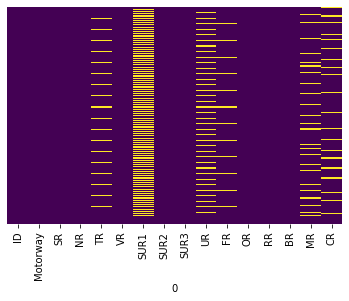

In [14]:
sns.heatmap(newdf.iloc[:,0:16].isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
newdf['MR'].fillna(value = 0, inplace = True)

In [16]:
newdf['CR'].fillna(value = 1, inplace = True)

In [17]:
newdf.drop('SUR1', axis = 1, inplace = True)

<AxesSubplot:xlabel='0'>

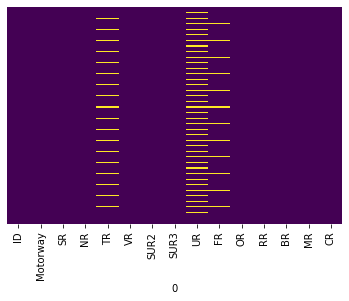

In [18]:
sns.heatmap(newdf.iloc[:,0:15].isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
def addFR(cols):
    FR = cols[0]
    VR = cols[1]
    
    if pd.isnull(FR):

        if VR == 0:
            return 4
        
        elif VR == 1:
            return 3
        
        elif VR == 2:
            return 2
        
        elif VR == 3:
            return 1

        else:
            return 0 #can also return something of probs - more feature engineering can be done

    else:
        return FR

In [20]:
newdf['FR'] = newdf[['FR','VR']].apply(addFR,axis=1)

In [21]:
def addUR(cols):
    UR = cols[0]
    FR = cols[1]
    
    if pd.isnull(UR):

        if FR == 0:
            return 0
        
        elif FR == 1:
            return 0
        
        elif FR == 2:
            return 1
        
        elif FR == 3:
            return 3

        else:
            return 3 #can also return something of probs - more feature engineering can be done

    else:
        return UR

In [22]:
newdf['UR'] = newdf[['UR','FR']].apply(addUR,axis=1)

<AxesSubplot:xlabel='0'>

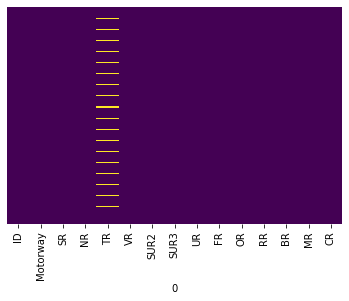

In [23]:
sns.heatmap(newdf.iloc[:,0:15].isnull(),yticklabels=False,cbar=False,cmap='viridis')

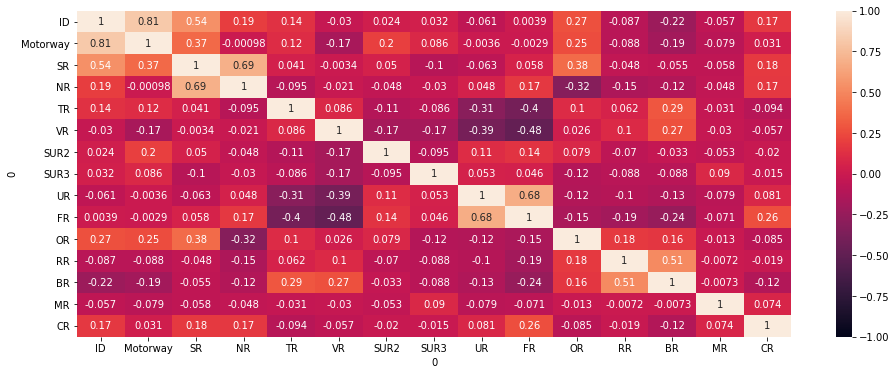

In [24]:
data_copy = newdf.iloc[:,0:15].copy()

data_copy['Motorway'] = data_copy['Motorway'].replace('A1', 1)
data_copy['Motorway'] = data_copy['Motorway'].replace('S52', 2)
data_copy = data_copy.apply(pd.to_numeric) 
plt.figure(figsize=(16, 6))
ax = sns.heatmap(data_copy.corr(),vmin=-1,vmax=1, annot=True)

In [27]:
species = ['GreenFrogs','BrownFrogs','CommonToad','FireBelliedToad','TreeFrog','CommonNewt','GreatCrestedNewt']
for x in species:
    if x in newdf.columns:
        print("Yes")

newdf['Species'] = newdf[species].astype(int).sum(axis=1)
newdf=newdf.drop(species, axis=1)

Yes
Yes
Yes
Yes
Yes
Yes
Yes


In [28]:
newdf

,ID,Motorway,SR,NR,TR,VR,SUR2,SUR3,UR,FR,OR,RR,BR,MR,CR,Species
1,1,A1,-62566.778872,1.274456,1,4,2,10,0,0,37.330200,0,0,0,1,0
2,2,A1,-57181.242934,1.238086,5,1,6,10,3,1,43.087667,1,1,0,1,3
3,3,A1,-52082.063443,1.208571,5,1,6,10,3,4,48.410097,1,1,0,1,3
4,4,A1,-47262.153516,1.185331,5,0,10,2,3,4,53.320804,0,0,0,1,1
5,5,A1,-42714.371064,1.167813,1,4,2,6,0,0,57.842258,0,5,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,192,S52,44119.624640,2.248277,1,3,9,6,3,4,84.304586,2,0,0,2,9
193,193,A1,48982.380786,2.443913,14,2,2,7,0,0,80.632872,2,1,0,1,2
194,194,S52,54121.926675,2.658203,12,2,10,2,0,0,76.491887,2,5,0,1,1
195,195,S52,59546.472182,2.892207,1,2,6,1,3,3,71.848978,2,0,0,1,7


In [29]:
def addTR(cols):
    TR = cols[0]
    FR = cols[1]
    
    if pd.isnull(TR):

        if FR == 0: #random function to generate a number from 0 to 10. If more than 8, pick 1 else pick 0
            y = random.randint(0, 16)
            if y < 5:
                return 15
            elif y >= 5 and y < 12:
                return 12
            elif y >= 12 and y < 14:
                return 14
            else: 
                return 1

        elif FR == 1:
            y = random.randint(0, 11)
            if y < 8:
                return 1
            elif y == 11:
                return 11
            else: 
                return 12
        
        elif FR == 2:
            y = random.randint(0, 10)
            if y < 3:
                return 5
            else: 
                return 1
        
        elif FR == 5:
            return 1
        
        elif FR == 9:
            y = random.randint(0, 10)
            if y < 2:
                return 2
            else: 
                return 1
            

        else:
            return 1 #can also return most occuring value of RR

    else:
        return TR

In [30]:
newdf['TR'] = newdf[['TR','FR']].apply(addTR,axis=1)

<AxesSubplot:xlabel='0'>

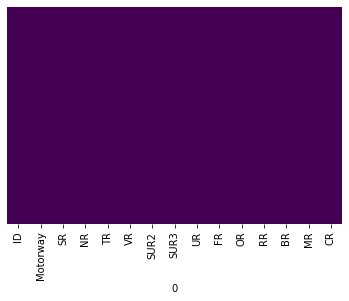

In [31]:
sns.heatmap(newdf.iloc[:,0:15].isnull(),yticklabels=False,cbar=False,cmap='viridis')

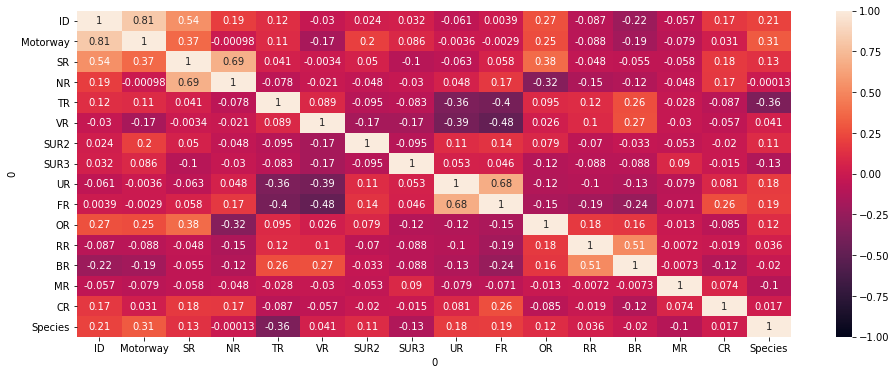

In [33]:
data_copy = newdf.iloc[:,0:16].copy()

data_copy['Motorway'] = data_copy['Motorway'].replace('A1', 1)
data_copy['Motorway'] = data_copy['Motorway'].replace('S52', 2)
data_copy = data_copy.apply(pd.to_numeric) 
plt.figure(figsize=(16, 6))
ax = sns.heatmap(data_copy.corr(),vmin=-1,vmax=1, annot=True)

In [40]:
ds = newdf
ds.drop_duplicates()

,Motorway,SR,NR,TR,VR,SUR2,SUR3,UR,FR,OR,RR,BR,MR,CR,Species
1,A1,-62566.778872,1.274456,1,4,2,10,0,0,37.330200,0,0,0,1,0
2,A1,-57181.242934,1.238086,5,1,6,10,3,1,43.087667,1,1,0,1,3
3,A1,-52082.063443,1.208571,5,1,6,10,3,4,48.410097,1,1,0,1,3
4,A1,-47262.153516,1.185331,5,0,10,2,3,4,53.320804,0,0,0,1,1
5,A1,-42714.371064,1.167813,1,4,2,6,0,0,57.842258,0,5,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,S52,44119.624640,2.248277,1,3,9,6,3,4,84.304586,2,0,0,2,9
193,A1,48982.380786,2.443913,14,2,2,7,0,0,80.632872,2,1,0,1,2
194,S52,54121.926675,2.658203,12,2,10,2,0,0,76.491887,2,5,0,1,1
195,S52,59546.472182,2.892207,1,2,6,1,3,3,71.848978,2,0,0,1,7


In [65]:
import xgboost as xgb
import statsmodels.api as sm
from plotnine import *
%matplotlib inline
from collections import Counter
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor

C:\Anaconda\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [62]:
def detect_outliers(df2,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        pd.to_numeric(df2[c])
        Q1 = np.percentile(df2[c],25)
        # 3rd quartile
        Q3 = np.percentile(df2[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5

        # detect outlier and their indeces
        outlier_list_col = df2[(df2[c] < Q1 - outlier_step) | \
                               (df2[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers


In [63]:
newdf.isna().sum()

0
Motorway    0
SR          0
NR          0
TR          0
VR          0
SUR2        0
SUR3        0
UR          0
FR          0
OR          0
RR          0
BR          0
MR          0
CR          0
Species     0
dtype: int64

In [66]:
# L = detect_outliers(newdf ,newdf.columns[1:])
# print(L). Not doing this because robust scaler is good at outlier detection and saturates them

In [85]:
df2 = newdf.copy() #Using df2 to label encoding
numerical_variables = ['ID','SR','NR']
categorical_variables = list(set(newdf.columns)-set(numerical_variables))

for i in species:
    try:
        categorical_variables.remove(i)
    except:
        continue
categorical_variables.remove('Motorway')

In [86]:
df2[categorical_variables] = newdf[categorical_variables].astype('int')
newdf

,Motorway,SR,NR,TR,VR,SUR2,SUR3,UR,FR,OR,RR,BR,MR,CR,Species
1,A1,-62566.778872,1.274456,1,4,2,10,0,0,37.330200,0,0,0,1,0
2,A1,-57181.242934,1.238086,5,1,6,10,3,1,43.087667,1,1,0,1,3
3,A1,-52082.063443,1.208571,5,1,6,10,3,4,48.410097,1,1,0,1,3
4,A1,-47262.153516,1.185331,5,0,10,2,3,4,53.320804,0,0,0,1,1
5,A1,-42714.371064,1.167813,1,4,2,6,0,0,57.842258,0,5,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,S52,44119.624640,2.248277,1,3,9,6,3,4,84.304586,2,0,0,2,9
193,A1,48982.380786,2.443913,14,2,2,7,0,0,80.632872,2,1,0,1,2
194,S52,54121.926675,2.658203,12,2,10,2,0,0,76.491887,2,5,0,1,1
195,S52,59546.472182,2.892207,1,2,6,1,3,3,71.848978,2,0,0,1,7


In [87]:

df2['TR'].replace({1:'natural reservoirs', 2:'recently formed', 5:'technological',
                   7:'garden',11:'trenches', 12:'wet meadows', 14:'river valleys',
                   15:'small watercourses'}, inplace=True)
df2['VR'].replace({0:'no vegetation', 1:'patches at the edges', 2:'heavily overgrown',
                   3:'some part devoid of vegetation',4:'reservoirs completely overgrown'},\
                  inplace=True)
for i in ['SUR2','SUR3']:
    df2[i].replace({1:'forest areas', 2:'meadows', 4:'gardens',
                   6:'industrial areas',10:'river valleys', 7:'orchards', 9:'roads',
                   14:'agricultural'}, inplace=True)
df2['UR'].replace({0:'unused', 1:'scenic', 3:'technological'}, inplace=True)
df2['FR'].replace({0:'lack', 1:'intense fishing', 2:'breeding reservoirs',\
                   3:'remove',4:'remove'}, inplace=True)
df2['RR'].replace({0:'<50 m', 1:'50-100 m', 2:'100-200 m',5:'200-500 m',9:'500-1000 m',\
                   10:'>10000'}, inplace=True)
df2['BR'].replace({0:'<50 m', 1:'50-100 m', 2:'100-200 m',5:'200-500 m',9:'500-1000 m',\
                   10:'>10000'}, inplace=True)
df2['MR'].replace({0:'Clean', 1:'slightly littered', 2:'heavily littered'}, inplace=True)
df2['CR'].replace({1:'Natural', 2:'Concrete'}, inplace=True)

In [88]:
df2.head()


,Motorway,SR,NR,TR,VR,SUR2,SUR3,UR,FR,OR,RR,BR,MR,CR,Species
1,A1,-62566.778872,1.274456,natural reservoirs,reservoirs completely overgrown,meadows,river valleys,unused,lack,37,<50 m,<50 m,Clean,Natural,0
2,A1,-57181.242934,1.238086,technological,patches at the edges,industrial areas,river valleys,technological,intense fishing,43,50-100 m,50-100 m,Clean,Natural,3
3,A1,-52082.063443,1.208571,technological,patches at the edges,industrial areas,river valleys,technological,remove,48,50-100 m,50-100 m,Clean,Natural,3
4,A1,-47262.153516,1.185331,technological,no vegetation,river valleys,meadows,technological,remove,53,<50 m,<50 m,Clean,Natural,1
5,A1,-42714.371064,1.167813,natural reservoirs,reservoirs completely overgrown,meadows,industrial areas,unused,lack,57,<50 m,200-500 m,Clean,Natural,5


In [89]:
df3 = pd.get_dummies(df2.drop(['SR','NR','OR','Species'],axis=1))
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 1 to 196
Data columns (total 54 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Motorway_A1                         196 non-null    uint8
 1   Motorway_S52                        196 non-null    uint8
 2   TR_garden                           196 non-null    uint8
 3   TR_natural reservoirs               196 non-null    uint8
 4   TR_recently formed                  196 non-null    uint8
 5   TR_river valleys                    196 non-null    uint8
 6   TR_small watercourses               196 non-null    uint8
 7   TR_technological                    196 non-null    uint8
 8   TR_trenches                         196 non-null    uint8
 9   TR_wet meadows                      196 non-null    uint8
 10  VR_heavily overgrown                196 non-null    uint8
 11  VR_no vegetation                    196 non-null    uint8
 12  VR_patch

In [90]:
frames = [df2[['SR','NR','OR','Species']],df3]
df_res = pd.concat(frames,axis=1)

Modelling

In [91]:
from sklearn.preprocessing import StandardScaler, RobustScaler


In [93]:
numerical = df_res[["SR","NR","OR","Species"]]
categorical=df_res.drop(["SR","OR","NR","Species"],axis=1)

scaler = RobustScaler()
numerical = pd.DataFrame(scaler.fit_transform(numerical))
numerical.columns = ["SR","NR","OR","Species"]

In [94]:
df_new = pd.concat([df['ID'],numerical, categorical], axis=1, join='inner')
df_new.head()

,ID,SR,NR,OR,Species,Motorway_A1,Motorway_S52,TR_garden,TR_natural reservoirs,TR_recently formed,...,BR_200-500 m,BR_50-100 m,BR_500-1000 m,BR_<50 m,BR_>10000,MR_Clean,MR_heavily littered,MR_slightly littered,CR_Concrete,CR_Natural
1,1,-3.861709,-0.120578,-6.125,0.000000,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
2,2,-3.494891,-0.199879,-5.500,0.000000,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,3,-3.148164,-0.262319,-4.875,-0.666667,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,4,-2.821012,-0.309385,-4.375,0.666667,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
5,5,-2.512919,-0.342488,-3.875,-1.000000,1,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1


In [95]:
newdf[categorical_variables] = newdf[categorical_variables].astype('int')
newdf['SR'] = newdf['SR'].astype('int')
newdf['NR'] = newdf['NR'].astype('int')
data= newdf
df

,ID,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,...,BR,MR,CR,GreenFrogs,BrownFrogs,CommonToad,FireBelliedToad,TreeFrog,CommonNewt,GreatCrestedNewt
1,1,A1,82.12266582245866,1.0,1,4,6,2,10,0,...,0,0,NaN,0,0,0,0,0,0,0
2,2,A1,-180534.4656684687,1.0,5,1,10,6,10,3,...,1,0,1,0,1,1,0,0,1,0
3,3,A1,1193.589181254818,1.0,5,1,NaN,6,10,3,...,1,0,1,0,1,1,0,0,1,0
4,4,A1,629.8641463331805,1.0,5,0,6,10,2,3,...,0,0,1,0,0,1,0,0,0,0
5,5,A1,-180803.7988286653,2.0,1,4,NaN,2,6,0,...,5,0,1,0,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,192,S52,115998.51789200924,9.0,1,3,2,9,6,3,...,0,0,2,3,1,1,0,2,0,2
193,193,A1,164.44266289433835,1.0,14,2,1,2,7,0,...,1,0,1,0,1,1,0,0,0,0
194,194,S52,-866.209002334941,1.0,12,2,10,10,2,0,...,5,0,1,0,1,0,0,0,0,0
195,195,S52,27369.210341745824,3.0,1,2,10,6,1,3,...,0,0,1,1,1,1,1,1,1,1


In [96]:
df_new = df_new.drop(["TR_garden","Motorway_A1","Motorway_S52","FR_remove"],axis=1)

In [97]:
y=df_new['Species']
x=df_new.drop(["Species"],axis=1)
X=pd.DataFrame(x)

In [100]:
y = newdf["Species"]
x = newdf.drop(["Species","Motorway"],axis=1)
x.head()


,SR,NR,TR,VR,SUR2,SUR3,UR,FR,OR,RR,BR,MR,CR
1,-62566,1,1,4,2,10,0,0,37,0,0,0,1
2,-57181,1,5,1,6,10,3,1,43,1,1,0,1
3,-52082,1,5,1,6,10,3,4,48,1,1,0,1
4,-47262,1,5,0,10,2,3,4,53,0,0,0,1
5,-42714,1,1,4,2,6,0,0,57,0,5,0,1


In [101]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.4,random_state=42)

In [102]:
xgb = XGBRegressor().fit(x_train, y_train)


C:\Anaconda\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


In [103]:
models_accuracy = {}
y_pred = xgb.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

1.7369599654172254

In [104]:
xgb


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [105]:
xgb_grid = {
    'colsample_bytree': [0.4, 0.5, 0.6, 0.9 ,1],
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [2, 3, 4, 5, 6],
    'learning_rate': [0.1, 0.01, 0.5]
}

In [106]:
xgb = XGBRegressor()
xgb_cv = GridSearchCV(xgb, 
                     param_grid = xgb_grid,
                     cv=10,
                     n_jobs = -1,
                     verbose = 2)
xgb_cv.fit(x_train, y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed: 12.2min finished
C:\Anaconda\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
      

In [107]:
xgb_cv.best_params_


{'colsample_bytree': 0.6,
 'learning_rate': 0.01,
 'max_depth': 2,
 'n_estimators': 500}

In [108]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.6,
                         learning_rate = 0.01,
                         max_depth = 2,
                         n_estimators = 500)
xgb_tuned = xgb_tuned.fit(x_train, y_train)

In [109]:
models_accuracy = {}
y_pred = xgb_tuned.predict(x_test)
models_accuracy['xgboost_label_encoding'] = np.sqrt(mean_squared_error(y_test, y_pred))
models_accuracy['xgboost_label_encoding']

1.656269202342403

GBM

In [112]:
y=df_new['Species']
x=df_new.drop(["Species",'ID'],axis=1)
X=pd.DataFrame(x)
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [113]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [114]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.7301669721424275

In [115]:
gbm_params = {
    "learning_rate": [0.01, 0.1, 0.2],
    'max_depth': [3,5,8,50,100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1, 0.5, 0.75],
}

In [116]:
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv=10, n_jobs = -1, verbose =2)
gbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed: 10.5min finished


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 8, 50, 100],
                         'n_estimators': [200, 500, 1000, 2000],
                         'subsample': [1, 0.5, 0.75]},
             verbose=2)

In [117]:
gbm_cv_model.best_params_


{'learning_rate': 0.01, 'max_depth': 50, 'n_estimators': 200, 'subsample': 0.5}

In [118]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.01,
                                      max_depth = 50,
                                      n_estimators = 200,
                                      subsample = 0.5)
gbm_tuned = gbm_tuned.fit(X_train, y_train)

In [121]:
y_pred = gbm_tuned.predict(X_test)
models_accuracy['gradient_boosting_one-hot_encoding'] =np.sqrt(mean_squared_error(y_test, y_pred))
models_accuracy

{'xgboost_label_encoding': 1.656269202342403,
 'gradient_boosting_one-hot_encoding': 0.6939234695426526}

Deep Learning

In [122]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [123]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(13,activation='softmax'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [124]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='loss', mode='max', verbose=1, patience=50)

In [127]:
y = df_new["Species"]
x = df_new.drop(["Species","ID"],axis=1)
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [128]:
model.fit(x=x_train,y=y_train, validation_data=(x_test,y_test.values), batch_size=16,epochs=500, verbose = 1)

Epoch 1/500
10/10 [==============================] - 2s 61ms/step - loss: 0.4327 - val_loss: 0.4744
Epoch 2/500
10/10 [==============================] - 0s 12ms/step - loss: 0.4235 - val_loss: 0.4693
Epoch 3/500
10/10 [==============================] - 0s 11ms/step - loss: 0.4173 - val_loss: 0.4652
Epoch 4/500
10/10 [==============================] - 0s 14ms/step - loss: 0.4131 - val_loss: 0.4619
Epoch 5/500
10/10 [==============================] - 0s 13ms/step - loss: 0.4095 - val_loss: 0.4599
Epoch 6/500
10/10 [==============================] - 0s 11ms/step - loss: 0.4054 - val_loss: 0.4588
Epoch 7/500
10/10 [==============================] - 0s 11ms/step - loss: 0.4027 - val_loss: 0.4580
Epoch 8/500
10/10 [==============================] - 0s 12ms/step - loss: 0.3999 - val_loss: 0.4572
Epoch 9/500
10/10 [==============================] - 0s 12ms/step - loss: 0.3970 - val_loss: 0.4570
Epoch 10/500
10/10 [==============================] - 0s 13ms/step - loss: 0.3930 - val_loss: 0.4565

10/10 [==============================] - 0s 11ms/step - loss: 0.0240 - val_loss: 0.6558
Epoch 83/500
10/10 [==============================] - 0s 11ms/step - loss: 0.0236 - val_loss: 0.6491
Epoch 84/500
10/10 [==============================] - 0s 11ms/step - loss: 0.0234 - val_loss: 0.6599
Epoch 85/500
10/10 [==============================] - 0s 11ms/step - loss: 0.0235 - val_loss: 0.6502
Epoch 86/500
10/10 [==============================] - 0s 11ms/step - loss: 0.0229 - val_loss: 0.6633
Epoch 87/500
10/10 [==============================] - 0s 11ms/step - loss: 0.0227 - val_loss: 0.6562
Epoch 88/500
10/10 [==============================] - 0s 12ms/step - loss: 0.0232 - val_loss: 0.6656
Epoch 89/500
10/10 [==============================] - 0s 11ms/step - loss: 0.0244 - val_loss: 0.6526
Epoch 90/500
10/10 [==============================] - 0s 11ms/step - loss: 0.0256 - val_loss: 0.6572
Epoch 91/500
10/10 [==============================] - 0s 11ms/step - loss: 0.0251 - val_loss: 0.6513
Epo

10/10 [==============================] - 0s 13ms/step - loss: 0.0100 - val_loss: 0.6701
Epoch 163/500
10/10 [==============================] - 0s 15ms/step - loss: 0.0095 - val_loss: 0.6801
Epoch 164/500
10/10 [==============================] - 0s 13ms/step - loss: 0.0091 - val_loss: 0.6786
Epoch 165/500
10/10 [==============================] - 0s 13ms/step - loss: 0.0086 - val_loss: 0.6898
Epoch 166/500
10/10 [==============================] - 0s 14ms/step - loss: 0.0081 - val_loss: 0.6888
Epoch 167/500
10/10 [==============================] - 0s 13ms/step - loss: 0.0079 - val_loss: 0.6909
Epoch 168/500
10/10 [==============================] - 0s 13ms/step - loss: 0.0076 - val_loss: 0.6847
Epoch 169/500
10/10 [==============================] - 0s 16ms/step - loss: 0.0076 - val_loss: 0.6955
Epoch 170/500
10/10 [==============================] - 0s 11ms/step - loss: 0.0075 - val_loss: 0.6938
Epoch 171/500
10/10 [==============================] - 0s 12ms/step - loss: 0.0076 - val_loss: 0

10/10 [==============================] - 0s 12ms/step - loss: 0.0084 - val_loss: 0.6520
Epoch 243/500
10/10 [==============================] - 0s 11ms/step - loss: 0.0088 - val_loss: 0.6300
Epoch 244/500
10/10 [==============================] - 0s 12ms/step - loss: 0.0100 - val_loss: 0.6348
Epoch 245/500
10/10 [==============================] - 0s 12ms/step - loss: 0.0134 - val_loss: 0.6997
Epoch 246/500
10/10 [==============================] - 0s 12ms/step - loss: 0.0166 - val_loss: 0.6586
Epoch 247/500
10/10 [==============================] - 0s 11ms/step - loss: 0.0146 - val_loss: 0.6193
Epoch 248/500
10/10 [==============================] - 0s 11ms/step - loss: 0.0106 - val_loss: 0.5931
Epoch 249/500
10/10 [==============================] - 0s 12ms/step - loss: 0.0089 - val_loss: 0.6365
Epoch 250/500
10/10 [==============================] - 0s 12ms/step - loss: 0.0075 - val_loss: 0.6616
Epoch 251/500
10/10 [==============================] - 0s 13ms/step - loss: 0.0077 - val_loss: 0

10/10 [==============================] - 0s 11ms/step - loss: 0.0078 - val_loss: 0.6242
Epoch 323/500
10/10 [==============================] - 0s 11ms/step - loss: 0.0065 - val_loss: 0.6150
Epoch 324/500
10/10 [==============================] - 0s 13ms/step - loss: 0.0061 - val_loss: 0.6090
Epoch 325/500
10/10 [==============================] - 0s 17ms/step - loss: 0.0054 - val_loss: 0.6132
Epoch 326/500
10/10 [==============================] - 0s 13ms/step - loss: 0.0047 - val_loss: 0.6042
Epoch 327/500
10/10 [==============================] - 0s 14ms/step - loss: 0.0039 - val_loss: 0.6132
Epoch 328/500
10/10 [==============================] - 0s 13ms/step - loss: 0.0036 - val_loss: 0.6030
Epoch 329/500
10/10 [==============================] - 0s 12ms/step - loss: 0.0031 - val_loss: 0.6060
Epoch 330/500
10/10 [==============================] - 0s 12ms/step - loss: 0.0029 - val_loss: 0.6171
Epoch 331/500
10/10 [==============================] - 0s 11ms/step - loss: 0.0028 - val_loss: 0

10/10 [==============================] - 0s 12ms/step - loss: 0.0019 - val_loss: 0.5853
Epoch 403/500
10/10 [==============================] - 0s 12ms/step - loss: 0.0020 - val_loss: 0.5837
Epoch 404/500
10/10 [==============================] - 0s 16ms/step - loss: 0.0019 - val_loss: 0.5826
Epoch 405/500
10/10 [==============================] - 0s 12ms/step - loss: 0.0018 - val_loss: 0.5860
Epoch 406/500
10/10 [==============================] - 0s 13ms/step - loss: 0.0017 - val_loss: 0.5847
Epoch 407/500
10/10 [==============================] - 0s 15ms/step - loss: 0.0017 - val_loss: 0.5856
Epoch 408/500
10/10 [==============================] - 0s 13ms/step - loss: 0.0016 - val_loss: 0.5878
Epoch 409/500
10/10 [==============================] - 0s 14ms/step - loss: 0.0017 - val_loss: 0.5879
Epoch 410/500
10/10 [==============================] - 0s 14ms/step - loss: 0.0016 - val_loss: 0.5845
Epoch 411/500
10/10 [==============================] - 0s 13ms/step - loss: 0.0016 - val_loss: 0

10/10 [==============================] - 0s 13ms/step - loss: 0.0061 - val_loss: 0.5611
Epoch 483/500
10/10 [==============================] - 0s 16ms/step - loss: 0.0063 - val_loss: 0.5668
Epoch 484/500
10/10 [==============================] - 0s 13ms/step - loss: 0.0054 - val_loss: 0.5745
Epoch 485/500
10/10 [==============================] - 0s 13ms/step - loss: 0.0057 - val_loss: 0.5939
Epoch 486/500
10/10 [==============================] - 0s 13ms/step - loss: 0.0059 - val_loss: 0.5748
Epoch 487/500
10/10 [==============================] - 0s 12ms/step - loss: 0.0044 - val_loss: 0.5684
Epoch 488/500
10/10 [==============================] - 0s 12ms/step - loss: 0.0030 - val_loss: 0.5782
Epoch 489/500
10/10 [==============================] - 0s 12ms/step - loss: 0.0030 - val_loss: 0.5739
Epoch 490/500
10/10 [==============================] - 0s 11ms/step - loss: 0.0030 - val_loss: 0.5663
Epoch 491/500
10/10 [==============================] - 0s 11ms/step - loss: 0.0020 - val_loss: 0

In [129]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [130]:
predictions = model.predict(x_test)

2/2 [==============================] - 0s 7ms/step


In [131]:
mean_absolute_error(y_test,predictions)

0.5886237472295761

In [132]:
np.sqrt(mean_squared_error(y_test,predictions))

0.756673212172046

In [133]:
explained_variance_score(y_test,predictions)

-0.23572564685761965

In [134]:
models_accuracy["ANN"] = np.sqrt(mean_squared_error(y_test,predictions))

In [135]:
models_accuracy

{'xgboost_label_encoding': 1.656269202342403,
 'gradient_boosting_one-hot_encoding': 0.6939234695426526,
 'ANN': 0.756673212172046}